# 🤟 Sign Language Detection -> YOLOv8

In this project, we are going to build a streamlit app that is powered by a Deep Learning CV YOLOv8 fine-tuned model that is given an image/video capable of finding the sign language letters used.


> ✅ Dataset used: https://universe.roboflow.com/david-lee-d0rhs/american-sign-language-letters/


**Note:** We are going to be using the YOLOv8 nano model, since we want users to use it on small devices as well

In [1]:
!pip install ultralytics
from ultralytics import YOLO

import torch
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.8/699.8 kB 7.9 MB/s eta 0:00:00


In [2]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Get dataset from google drive

Since our dataset is pretty big, even uploading its zip to colab would take a lot of time, hence we can first upload it to drive and then access it using the following code

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir sign_language_detection
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/American Sign Language Letters.v6-raw.yolov8.zip', 'r')
zip_ref.extractall('/content/sign_language_detection')
zip_ref.close()

## YOLOv8 Inferences

Let's make some sample inferences with YOLOv8

In [5]:
from ultralytics import YOLO

# Load a model
infernce_model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

100%|██████████| 6.23M/6.23M [00:00<00:00, 101MB/s]


In [6]:
results = infernce_model("https://ultralytics.com/images/bus.jpg", conf=0.5, show=True, save=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()




100%|██████████| 476k/476k [00:00<00:00, 16.7MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/bus.jpg: 640x480 3 persons, 1 bus, 361.2ms
Speed: 13.8ms preprocess, 361.2ms inference, 1632.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


In [7]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 165k/165k [00:00<00:00, 11.6MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 127.8ms
Speed: 3.5ms preprocess, 127.8ms inference, 606.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Visualize some samples of our data

In [8]:
import glob

# Get all train images path
train_images_path = glob.glob('/content/sign_language_detection/train/images/*')

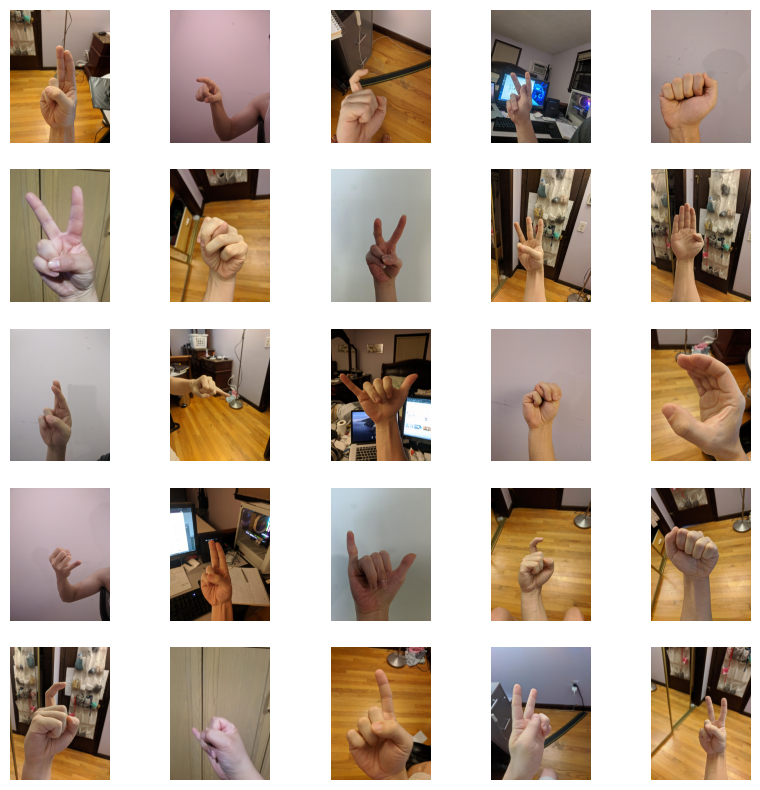

In [9]:
import random
import matplotlib.pyplot as plt

# take random sample
rows = 5
cols = 5

plt.figure(figsize=(10, 10))

for idx in range(25):
  sample_img = plt.imread(random.choice(train_images_path))
  plt.subplot(rows, cols, idx+1)
  plt.imshow(sample_img)
  plt.axis(False);

## Fine-tuning YOLOv8 model

1. Build a YAML Configuration file as `congfig.yaml`
  * Example of Configuration file
    ```
    %%writefile google_colab_config.yaml

    # PATHS
    path: /content/sign_language_detection
    train: train/images/
    val: valid/images/
    test: test/images/

    # Classes
    nc: 26
    names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
    ```

2. Load in Pre-trained YOLOv8 model from ultraltics and train it

In [10]:
%%writefile google_colab_config.yaml

# PATHS
path: /content/sign_language_detection
train: train/images/
val: valid/images/
test: test/images/

# Classes
nc: 26
names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

Writing google_colab_config.yaml


In [11]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt").to(device)

model.train(data='/content/google_colab_config.yaml', epochs=35)

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/google_colab_config.yaml, epochs=35, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, i

100%|██████████| 755k/755k [00:00<00:00, 20.9MB/s]


Overriding model.yaml nc=80 with nc=26

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/sign_language_detection/train/labels... 504 images, 0 backgrounds, 0 corrupt: 100%|██████████| 504/504 [00:00<00:00, 1939.35it/s]

train: New cache created: /content/sign_language_detection/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/sign_language_detection/valid/labels... 144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:00<00:00, 1035.68it/s]

val: New cache created: /content/sign_language_detection/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      2.54G     0.8963      4.392      1.335         21        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        144        144          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      2.41G     0.6943      3.922      1.168         19        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        144        144     0.0394      0.906      0.158       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      2.42G     0.6949      3.518      1.195         17        640: 100%|██████████| 32/32 [00:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        144        144      0.667      0.167      0.255      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      2.42G     0.6896      3.145      1.177         17        640: 100%|██████████| 32/32 [00:26<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.12it/s]

                   all        144        144      0.431      0.501      0.367      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      2.42G     0.7288      2.942      1.209         19        640: 100%|██████████| 32/32 [00:26<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.94it/s]

                   all        144        144      0.292      0.672      0.485      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      2.42G     0.6876      2.716      1.167         19        640: 100%|██████████| 32/32 [00:26<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.82it/s]

                   all        144        144      0.399      0.645      0.525      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      2.42G     0.6679      2.625      1.138         18        640: 100%|██████████| 32/32 [00:24<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


                   all        144        144      0.518      0.552      0.539      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      2.42G     0.6738      2.442      1.142         18        640: 100%|██████████| 32/32 [00:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

                   all        144        144      0.655      0.533      0.665      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      2.42G     0.6517      2.309      1.126         18        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.05it/s]

                   all        144        144      0.625      0.563      0.659      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      2.42G      0.634      2.217      1.132         13        640: 100%|██████████| 32/32 [00:29<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.85it/s]

                   all        144        144      0.699      0.623       0.74      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      2.42G      0.616      2.122      1.096         16        640: 100%|██████████| 32/32 [00:26<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]

                   all        144        144      0.679      0.613      0.758      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      2.42G     0.6087      2.044      1.103         15        640: 100%|██████████| 32/32 [00:26<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.98it/s]

                   all        144        144      0.767      0.561      0.771      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      2.42G     0.5887      1.966      1.078         19        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        144        144      0.795      0.633      0.787      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      2.42G     0.5686      1.835      1.079         11        640: 100%|██████████| 32/32 [00:24<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.37it/s]

                   all        144        144      0.755      0.675      0.818      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      2.42G     0.5525      1.744      1.053         18        640: 100%|██████████| 32/32 [00:24<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.93it/s]

                   all        144        144      0.674      0.754       0.81      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      2.42G     0.5744      1.732      1.071         19        640: 100%|██████████| 32/32 [00:25<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        144        144      0.735      0.707      0.813      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      2.42G     0.5478      1.627      1.059         18        640: 100%|██████████| 32/32 [00:27<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.10it/s]

                   all        144        144      0.761      0.796      0.881      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      2.42G     0.5228       1.57      1.039         16        640: 100%|██████████| 32/32 [00:26<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.04it/s]

                   all        144        144      0.798      0.784      0.889      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      2.42G     0.5283      1.541      1.045         23        640: 100%|██████████| 32/32 [00:24<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


                   all        144        144      0.794        0.8       0.88        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      2.42G     0.4951      1.439      1.024         21        640: 100%|██████████| 32/32 [00:24<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]

                   all        144        144      0.828      0.779      0.881      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      2.42G     0.5285      1.511      1.031         20        640: 100%|██████████| 32/32 [00:25<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.24it/s]

                   all        144        144      0.859      0.791      0.906      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      2.42G     0.4897      1.362       1.01         18        640: 100%|██████████| 32/32 [00:26<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.03it/s]

                   all        144        144      0.801      0.785      0.896      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      2.42G     0.4958      1.366      1.013         18        640: 100%|██████████| 32/32 [00:26<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]

                   all        144        144      0.772      0.798      0.892      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      2.42G     0.4817      1.285     0.9956         17        640: 100%|██████████| 32/32 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        144        144      0.855      0.811      0.918      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      2.42G     0.4726      1.307      1.015         15        640: 100%|██████████| 32/32 [00:23<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        144        144      0.821      0.878      0.926       0.86


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      2.42G     0.3335      1.454     0.8966          8        640: 100%|██████████| 32/32 [00:28<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        144        144      0.733      0.877      0.909      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      2.42G     0.3186      1.296     0.8823          8        640: 100%|██████████| 32/32 [00:23<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        144        144      0.826      0.831       0.92      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      2.42G     0.3002      1.288      0.869          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.15it/s]

                   all        144        144      0.859      0.866      0.938      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      2.42G     0.2999      1.207     0.8758          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all        144        144      0.867      0.886      0.929      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      2.42G     0.2849       1.17     0.8821          8        640: 100%|██████████| 32/32 [00:25<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        144        144      0.916      0.852      0.937      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      2.42G     0.2799      1.127     0.8595          8        640: 100%|██████████| 32/32 [00:23<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


                   all        144        144      0.906      0.863      0.944      0.892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      2.42G     0.2718      1.114     0.8432          8        640: 100%|██████████| 32/32 [00:23<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        144        144      0.894      0.863       0.94      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      2.42G     0.2693      1.084     0.8433          8        640: 100%|██████████| 32/32 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.19it/s]

                   all        144        144      0.917       0.86      0.947      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      2.42G     0.2659      1.083      0.849          8        640: 100%|██████████| 32/32 [00:26<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]

                   all        144        144      0.891      0.873      0.944      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      2.42G     0.2669      1.082      0.856          8        640: 100%|██████████| 32/32 [00:24<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.29it/s]

                   all        144        144      0.883      0.888      0.943      0.895



35 epochs completed in 0.296 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3010718 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


                   all        144        144      0.917       0.86      0.947      0.895
                     A        144          5          1      0.853      0.995      0.995
                     B        144          9          1       0.67      0.963      0.896
                     C        144          3      0.923          1      0.995      0.847
                     D        144          6      0.845          1      0.972      0.913
                     E        144          4      0.942          1      0.995      0.995
                     F        144          8      0.997          1      0.995      0.977
                     G        144          5      0.867          1      0.995      0.975
                     H        144          9          1      0.948      0.995      0.964
                     I        144          2      0.433        0.5      0.545      0.545
                     J        144          8          1      0.806      0.971      0.694
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79bfc6589630>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

### Moving runs/ folder to google drive

In [15]:
import shutil
import os

def move_folder(source_folder, destination_folder):
    """Moves an existing folder to a new location.

    Args:
        source_folder (str): The path to the folder to be moved.
        destination_folder (str): The path to the destination folder.

    Raises:
        FileNotFoundError: If the source folder doesn't exist.
        OSError: If there's an error moving the folder.
    """

    if not os.path.exists(source_folder):
        raise FileNotFoundError(f"Source folder not found: {source_folder}")

    try:
        shutil.move(source_folder, destination_folder)
        print(f"Folder moved successfully from {source_folder} to {destination_folder}")
    except OSError as e:
        raise OSError(f"Error moving folder: {e}") from e

# testing it
source_path = "/content/runs"
destination_path = "/content/drive/MyDrive/Sign-language-detection-results"

move_folder(source_path, destination_path)

Folder moved successfully from /content/runs to /content/drive/MyDrive/Sign-language-detection-results


## Visualize Training performances

(-0.5, 2249.5, 1499.5, -0.5)

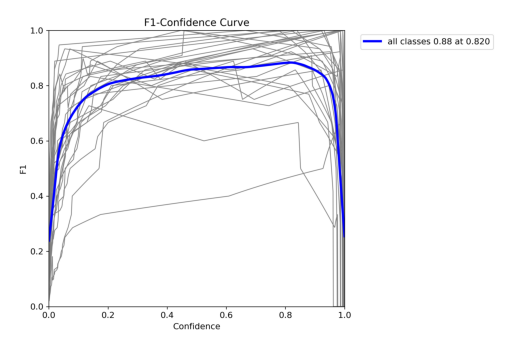

In [30]:
plt.imshow(plt.imread('/content/drive/MyDrive/Sign-language-detection-results/runs/detect/train/F1_curve.png'))
plt.axis(False)

(-0.5, 2249.5, 1499.5, -0.5)

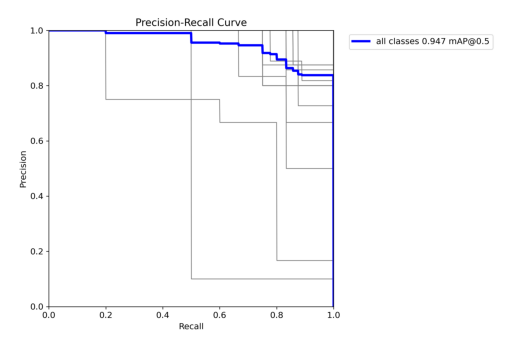

In [31]:
plt.imshow(plt.imread('/content/drive/MyDrive/Sign-language-detection-results/runs/detect/train/PR_curve.png'))
plt.axis(False)

(-0.5, 2249.5, 1499.5, -0.5)

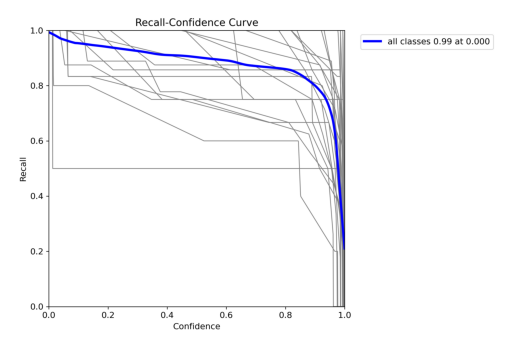

In [32]:
plt.imshow(plt.imread('/content/drive/MyDrive/Sign-language-detection-results/runs/detect/train/R_curve.png'))
plt.axis(False)

(-0.5, 2249.5, 1499.5, -0.5)

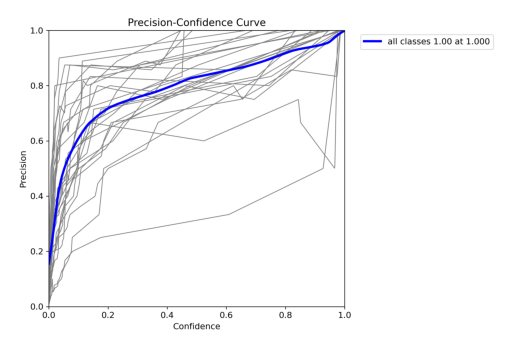

In [34]:
plt.imshow(plt.imread('/content/drive/MyDrive/Sign-language-detection-results/runs/detect/train/P_curve.png'))
plt.axis(False)

(-0.5, 2999.5, 2249.5, -0.5)

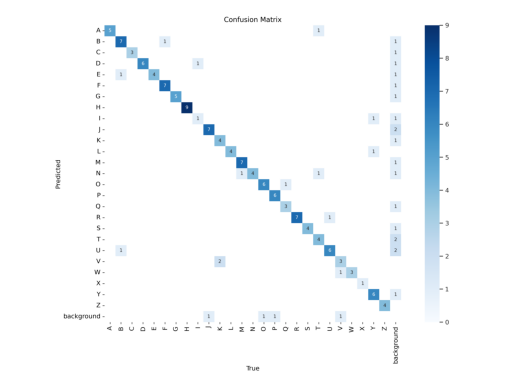

In [35]:
plt.imshow(plt.imread('/content/drive/MyDrive/Sign-language-detection-results/runs/detect/train/confusion_matrix.png'))
plt.axis(False)

(-0.5, 2999.5, 2249.5, -0.5)

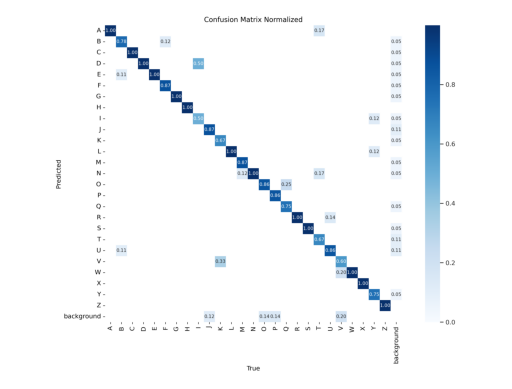

In [36]:
plt.imshow(plt.imread('/content/drive/MyDrive/Sign-language-detection-results/runs/detect/train/confusion_matrix_normalized.png'))
plt.axis(False)

(-0.5, 1599.5, 1599.5, -0.5)

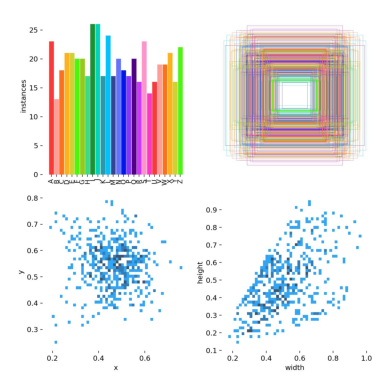

In [37]:
plt.imshow(plt.imread('/content/drive/MyDrive/Sign-language-detection-results/runs/detect/train/labels.jpg'))
plt.axis(False)

(-0.5, 1999.5, 1999.5, -0.5)

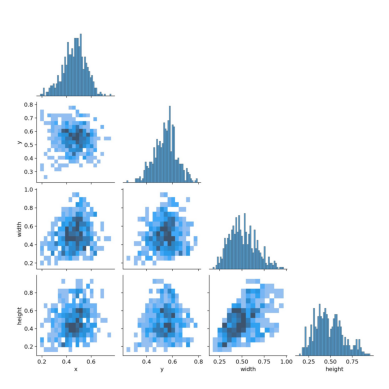

In [38]:
plt.imshow(plt.imread('/content/drive/MyDrive/Sign-language-detection-results/runs/detect/train/labels_correlogram.jpg'))
plt.axis(False)

(-0.5, 2399.5, 1199.5, -0.5)

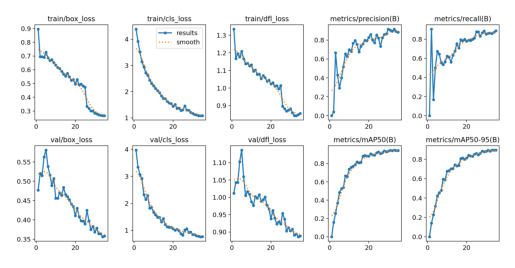

In [39]:
plt.imshow(plt.imread('/content/drive/MyDrive/Sign-language-detection-results/runs/detect/train/results.png'))
plt.axis(False)

(-0.5, 1919.5, 1919.5, -0.5)

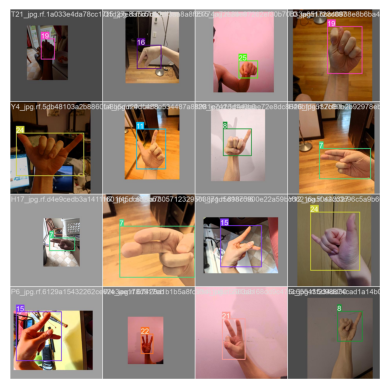

In [40]:
plt.imshow(plt.imread('/content/drive/MyDrive/Sign-language-detection-results/runs/detect/train/train_batch802.jpg'))
plt.axis(False)

(-0.5, 1463.5, 1919.5, -0.5)

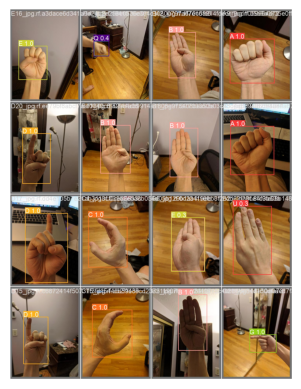

In [41]:
plt.imshow(plt.imread('/content/drive/MyDrive/Sign-language-detection-results/runs/detect/train/val_batch2_pred.jpg'))
plt.axis(False)